<img src="https://www.insidehighered.com/sites/default/server_files/media/california_0.jpg" width=400>  


The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory

Acknowledgements:
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

In [1]:
import pandas as pd
CA_url="https://raw.githubusercontent.com/csbfx/advpy122-data/master/California_housing.csv"

ca = pd.read_csv(CA_url)
ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Preprocessing
# The dataset contains duplicate districts even though they were recorded in a single year: 1990
# Assuming, each row represents a district, each district should be represented only once
ca[['longitude', 'latitude']].value_counts()

longitude  latitude
-122.41    37.80       15
-122.44    37.78       11
-122.42    37.80       11
-122.43    37.77       10
-122.27    37.85       10
                       ..
-120.69    36.84        1
           37.40        1
           37.59        1
           37.77        1
-114.31    34.19        1
Name: count, Length: 12590, dtype: int64

In [4]:
# Therefore, I will take the mean of the numeric columns and choose the most frequent value in the ocean_proximity column for each group
# Now, there is no duplicate districts
ca_clean = ca.groupby(['longitude', 'latitude']).agg(
    housing_median_age = ('housing_median_age', 'mean'),
    total_rooms = ('total_rooms', 'mean'),
    total_bedrooms = ('total_bedrooms', 'mean'),
    population = ('population', 'mean'),
    households = ('households', 'mean'),
    median_income = ('median_income', 'mean'),
    median_house_value = ('median_house_value', 'mean'),
    ocean_proximity = ('ocean_proximity', lambda x: x.mode()[0])
    ).reset_index()
# as we can see, the number of rows dropped significantly
ca_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0,NEAR OCEAN
1,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
2,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,NEAR OCEAN
3,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,NEAR OCEAN
4,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12585,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,INLAND
12586,-114.55,32.80,19.0,2570.0,820.0,1431.0,608.0,1.2750,56100.0,INLAND
12587,-114.49,33.97,17.0,2809.0,635.0,83.0,45.0,1.6154,87500.0,INLAND
12588,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,INLAND


### Q1: show the number of missing data in each column of the dataframe

In [5]:
# For the original dataset:
ca.isnull().sum()

# For the clean dataset:
# ca_clean.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


### Q2: show the data type for each column of the dataframe

In [6]:
# For both the original and clean datasets
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



### Q3: Plot a regression line and confidence interval
Create a lmplot that shows the linear regression between `median_income` and `median_house_value`. Only use data with `median_housing_value` < 500000. Include a meaningful title for the plot.

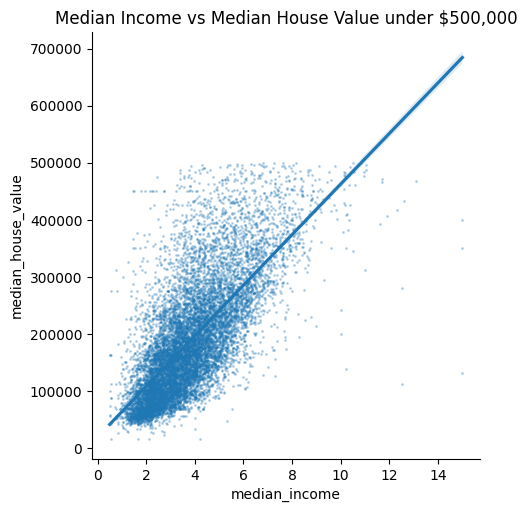

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=ca_clean[ca_clean['median_house_value'] < 500_000],
           x="median_income",
           y="median_house_value",
           markers='.',
           scatter_kws={'s':5, 'alpha':0.25}),
plt.title("Median Income vs Median House Value under $500,000");

### Q4: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

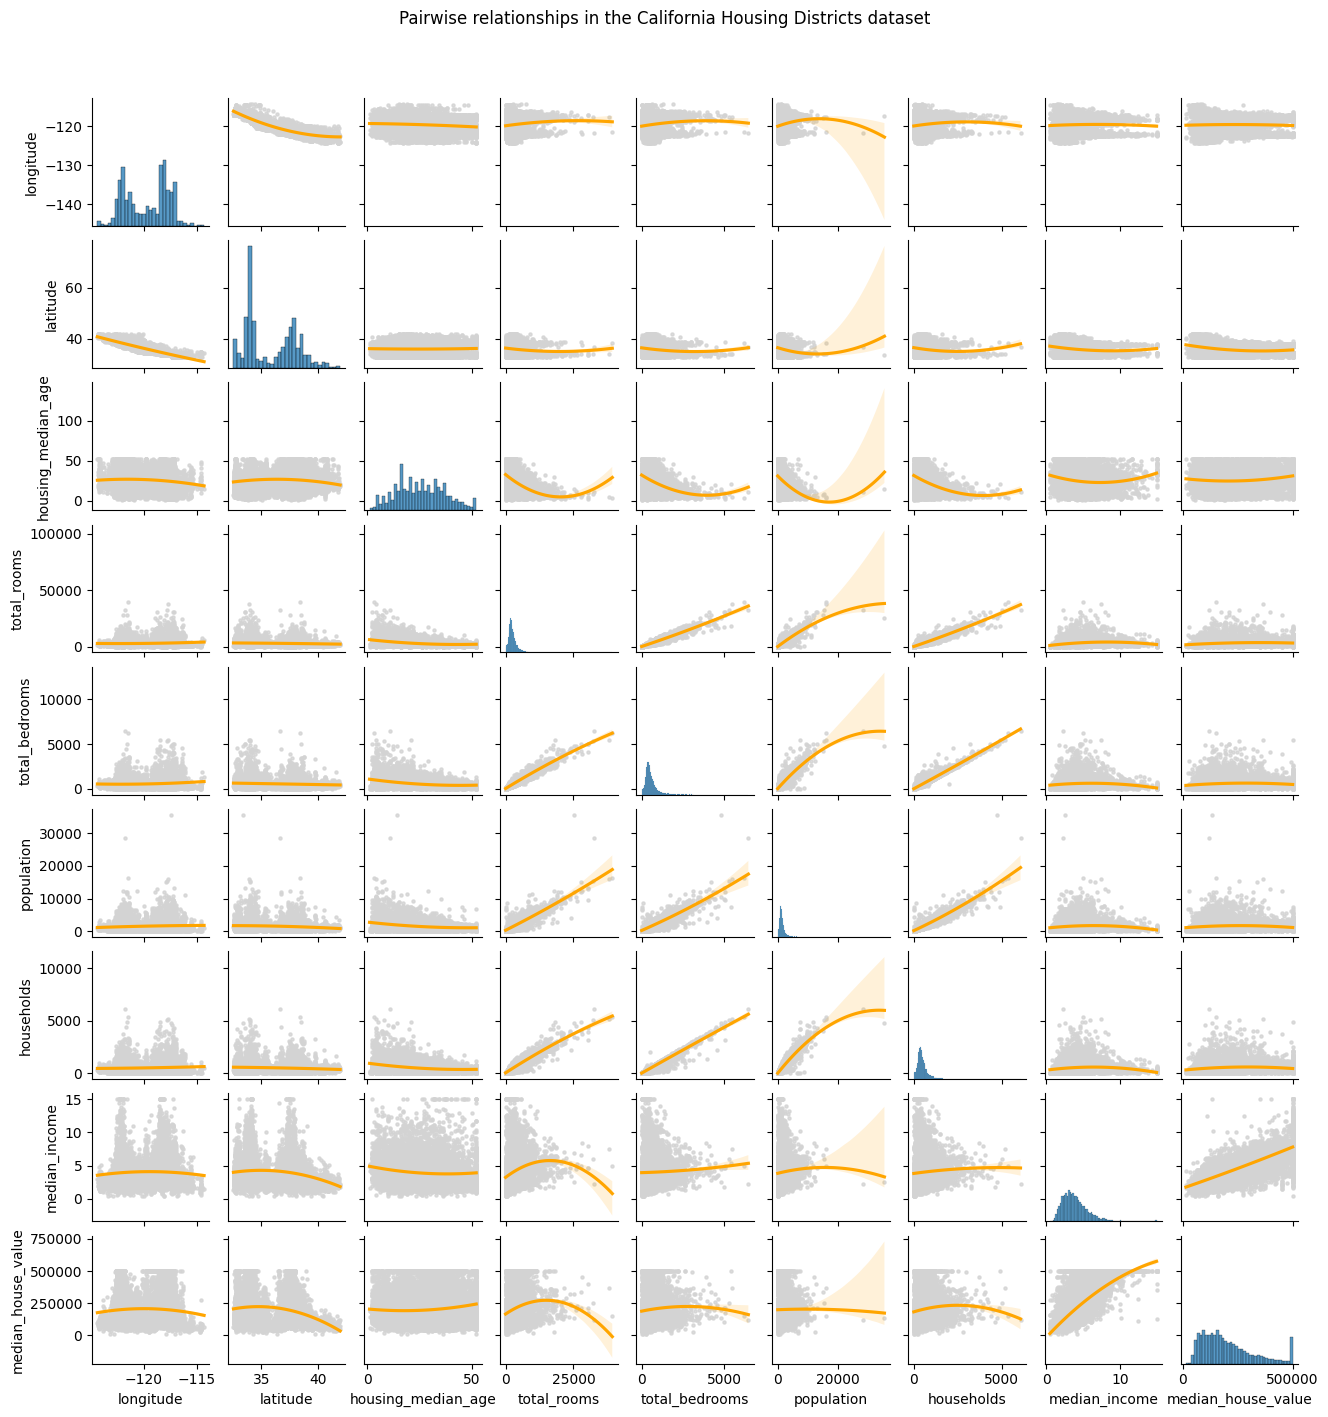

In [29]:
g=sns.pairplot(
    data=ca_clean,
    kind="reg",
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "line_kws":{"color":"orange"}, "order":2}, # draw small points
    height=1.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships in the California Housing Districts dataset", y=1.05
);


### Q5. Create a relplot that shows the `median_income` and `median_house` along with the `longitude` and `latitude`.
Plot `longitude` along the x-axis and `latitude` along the y-axis. Use `hue` to display the `median_house_value` and the size of the data point `median_income`. Include a meaningful title to the plot.

Text(0.5, 1.0, 'Median House Value and Median Income of Each District in CA')

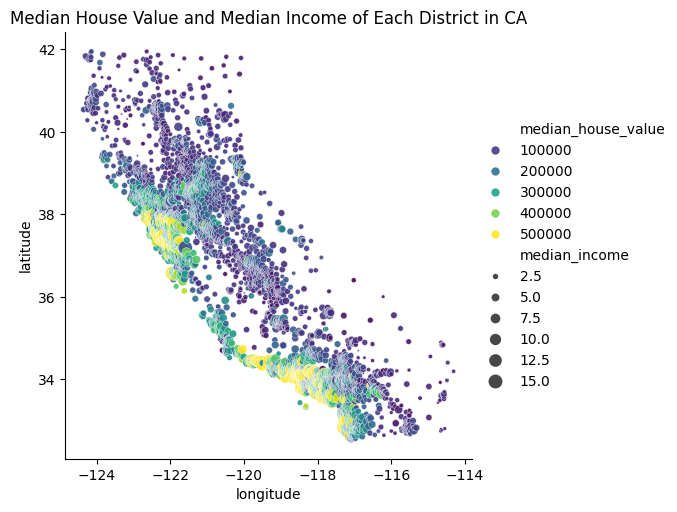

In [43]:
sns.relplot(
    data=ca_clean,
    x="longitude",
    y="latitude",
    hue="median_house_value",
    palette="viridis",
    size="median_income",
    sizes=(2,100),
    alpha=0.9
)
plt.title("Median House Value and Median Income of Each District in CA")

### Q6: Create a plot with small multiples plots
The small multiple plots should show the relationship between `median_house_value` vs `median_income` using `ocean_proximity` as the single category. Only use data with `median_house_value` < 500000. Organize the multiple plots to have 2 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

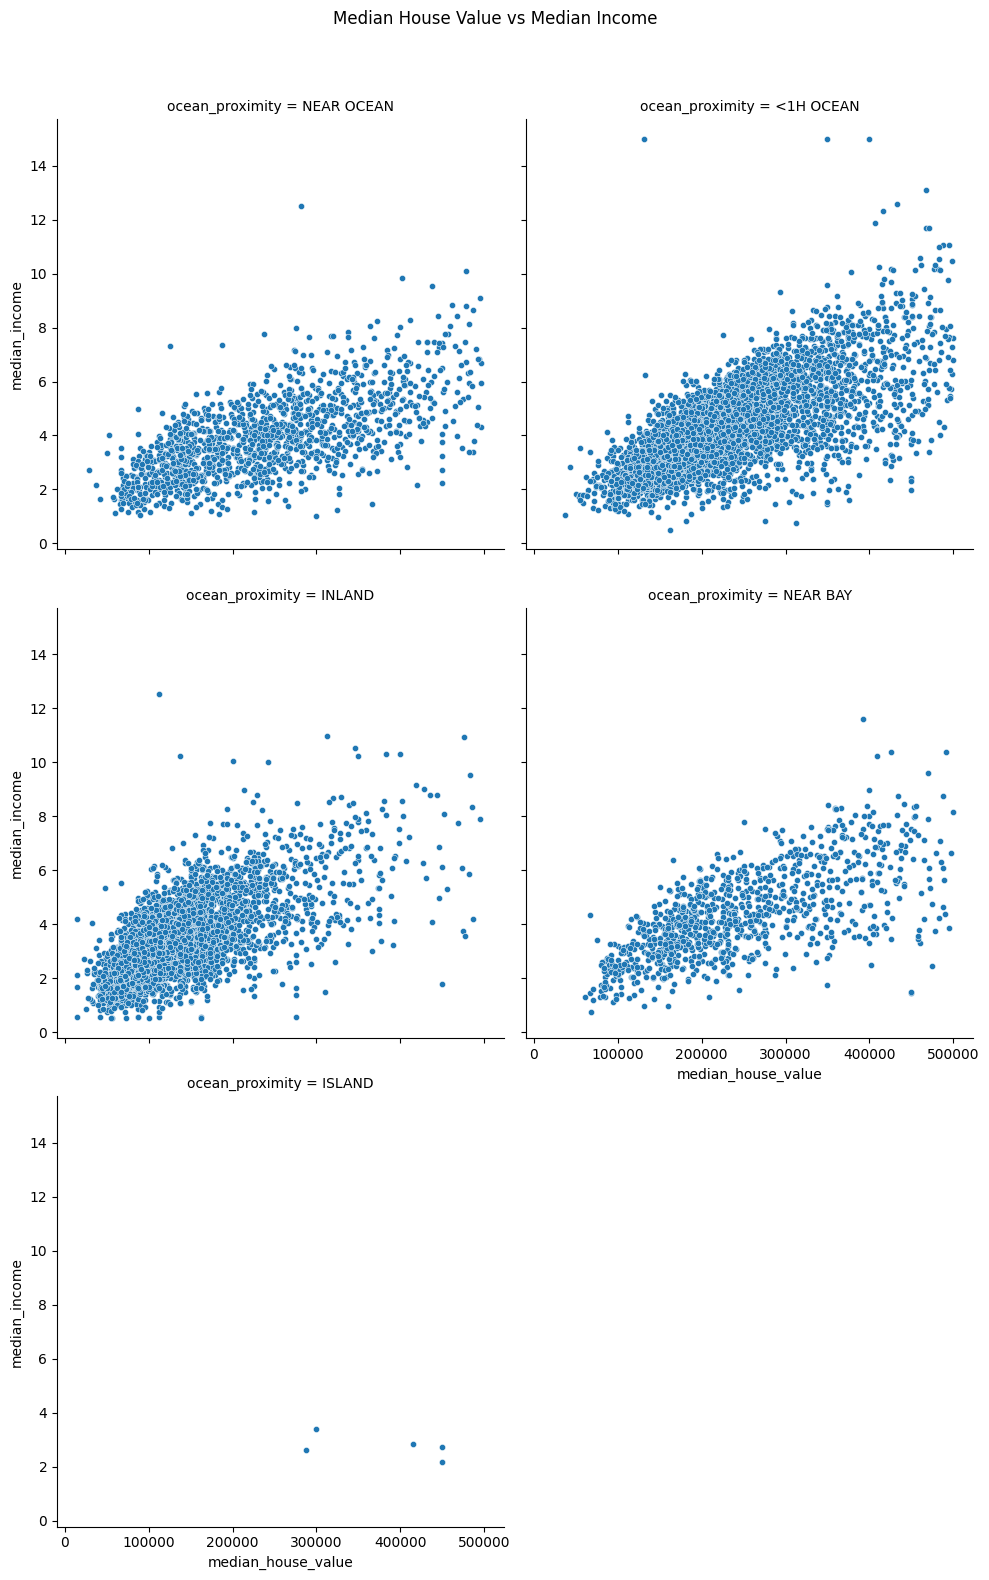

In [59]:
g=sns.relplot(
    data=ca_clean[ca_clean["median_house_value"] < 500_000],
    x="median_house_value",
    y="median_income",
    col="ocean_proximity",
    col_wrap=2,
    height=5,
    s=20
)
g.fig.suptitle("Median House Value vs Median Income", y=1.05);
